In [24]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Load Data

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Show Images

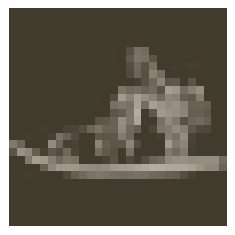

In [3]:
image, label = next(iter(trainloader))

In [7]:
fig, axs = plt.subplots(12,6, figsize=(60, 55), sharey='row')


torch.Size([64, 1, 28, 28])

# Initialize model

In [11]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,10)
    def forward(self,x):
        #make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x),dim=1)
        return x

# Define criterion and optimizer

In [20]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)
epochs = 30
steps = 0

train_losses , test_losses = [],[]
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        #turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim =1 )
                equals = top_class ==labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.549..  Test Loss: 0.462..  Test Accuracy: 0.839
Epoch: 2/30..  Training Loss: 0.406..  Test Loss: 0.441..  Test Accuracy: 0.838
Epoch: 3/30..  Training Loss: 0.363..  Test Loss: 0.386..  Test Accuracy: 0.862
Epoch: 4/30..  Training Loss: 0.339..  Test Loss: 0.385..  Test Accuracy: 0.868
Epoch: 5/30..  Training Loss: 0.322..  Test Loss: 0.389..  Test Accuracy: 0.866
Epoch: 6/30..  Training Loss: 0.312..  Test Loss: 0.379..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.295..  Test Loss: 0.388..  Test Accuracy: 0.866
Epoch: 8/30..  Training Loss: 0.288..  Test Loss: 0.401..  Test Accuracy: 0.873
Epoch: 9/30..  Training Loss: 0.276..  Test Loss: 0.378..  Test Accuracy: 0.869
Epoch: 10/30..  Training Loss: 0.266..  Test Loss: 0.394..  Test Accuracy: 0.865
Epoch: 11/30..  Training Loss: 0.266..  Test Loss: 0.367..  Test Accuracy: 0.878
Epoch: 12/30..  Training Loss: 0.258..  Test Loss: 0.387..  Test Accuracy: 0.876
Epoch: 13/30..  Training Loss: 0.253.

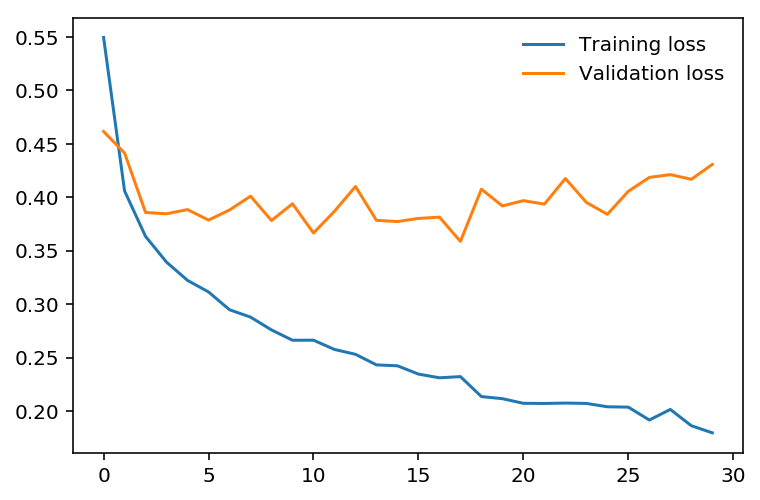

In [22]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# OVERFITTING

In [25]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,10)
        
        # Dropout module with 0.2 drop probability
        self.dropout_20 = nn.Dropout(p=0.2)
        self.dropout_15 = nn.Dropout(p=0.15)
        self.dropout_10 = nn.Dropout(p=0.1)
        self.dropout_05 = nn.Dropout(p=0.05)
    def forward(self,x):
        #make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        x = self.dropout_20(F.relu(self.fc1(x)))
        x = self.dropout_15(F.relu(self.fc2(x)))
        x = self.dropout_10(F.relu(self.fc3(x)))
        x = self.dropout_05(F.relu(self.fc4(x)))
        x = F.log_softmax(self.fc5(x),dim=1)
        return x

In [28]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.601..  Test Loss: 0.500..  Test Accuracy: 0.821
Epoch: 2/30..  Training Loss: 0.477..  Test Loss: 0.454..  Test Accuracy: 0.831
Epoch: 3/30..  Training Loss: 0.447..  Test Loss: 0.421..  Test Accuracy: 0.847
Epoch: 4/30..  Training Loss: 0.426..  Test Loss: 0.415..  Test Accuracy: 0.857
Epoch: 5/30..  Training Loss: 0.406..  Test Loss: 0.396..  Test Accuracy: 0.858
Epoch: 6/30..  Training Loss: 0.401..  Test Loss: 0.387..  Test Accuracy: 0.863
Epoch: 7/30..  Training Loss: 0.391..  Test Loss: 0.424..  Test Accuracy: 0.851
Epoch: 8/30..  Training Loss: 0.387..  Test Loss: 0.414..  Test Accuracy: 0.860
Epoch: 9/30..  Training Loss: 0.382..  Test Loss: 0.408..  Test Accuracy: 0.854
Epoch: 10/30..  Training Loss: 0.382..  Test Loss: 0.418..  Test Accuracy: 0.857
Epoch: 11/30..  Training Loss: 0.382..  Test Loss: 0.403..  Test Accuracy: 0.865
Epoch: 12/30..  Training Loss: 0.372..  Test Loss: 0.392..  Test Accuracy: 0.865
Epoch: 13/30..  Training Loss: 0.366.

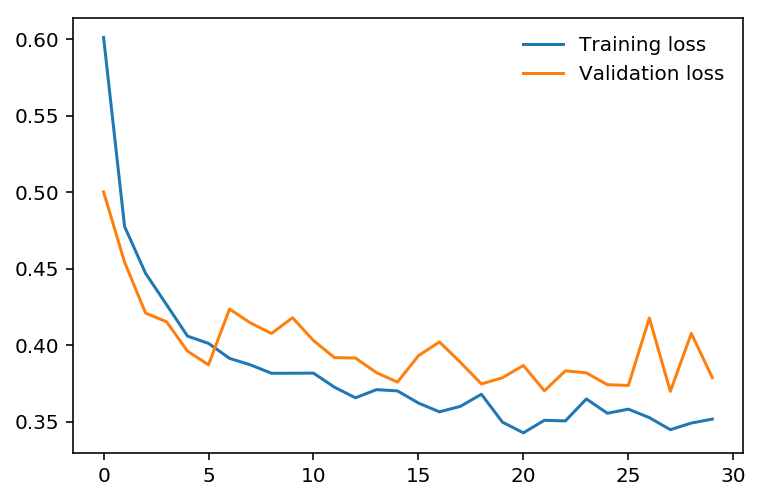

In [29]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# Inference

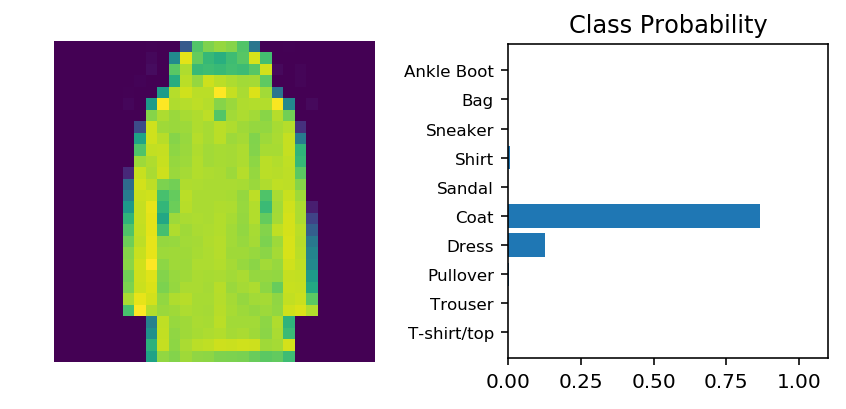

In [31]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

# Saving and Loading networks

In [33]:
print("Our model: \n\n",model, "\n")
print("The state dict keys: \n\n",model.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout_20): Dropout(p=0.2)
  (dropout_15): Dropout(p=0.15)
  (dropout_10): Dropout(p=0.1)
  (dropout_05): Dropout(p=0.05)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'fc5.weight', 'fc5.bias'])


In [36]:
#save model
torch.save(model.state_dict(),'CheckPoint.pth')

In [37]:
#load model
state_dict = torch.load('CheckPoint.pth')

In [39]:
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'fc5.weight', 'fc5.bias'])


In [40]:
#load the state dict in to the network, you do model.load_state_dict(state_dict)
model.load_state_dict(state_dict)